In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'cubehelix'
plt.rcParams['image.origin'] = 'lower'

In [2]:
from sherpa.astro import ui
from sherpa.models import Const2D
from sherpa.astro.models import Sersic2D
from sherpa.astro.data import Data2D
import numpy as np
import corner

failed to import sherpa.image.ds9_backend due to 
'RuntimeErr: DS9Win unusable: Could not find ds9 on your PATH'


In [20]:
np.random.seed(4)
x0lo, x0hi = 0, 1020
x1lo, x1hi = 0, 1020
dx = 5
x1, x0 = np.mgrid[x1lo:x1hi:dx, x0lo:x0hi:dx]
shape = x0.shape
x0 = x0.flatten()
x1 = x1.flatten()

source_one = Sersic2D('src1')
source_one.xpos = 560
source_one.ypos = 485
source_one.ampl = 3500
source_one.n = 4
source_one.r0 = 45
source_one.ellip = 0.2
source_one.theta = 0.4

source_two = Const2D('src2')
source_two.c0 = 500

source = source_one + source_two

emission = source(x0, x1).reshape(shape)
noise = np.random.normal(0, 50, shape)
image = emission + noise

ui.load_arrays(1, x0, x1, image.flatten(), Data2D)

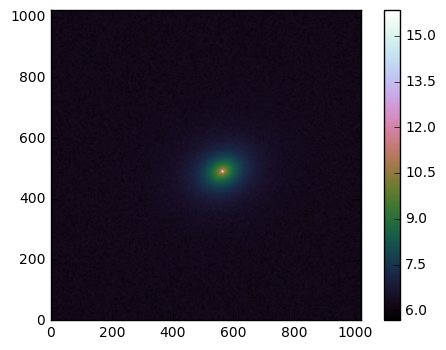

In [22]:
boundaries = (x0lo, x0hi, x1lo, x1hi)
plt.imshow(np.log(image), extent=boundaries)
plt.colorbar()

In [23]:
model_one = Sersic2D('model_one')
model_two = Const2D('model_two')
model_one.n.thaw()
n = 5
model_one.n = n
b_n = 2*n + 4./405*n + 46/25515*n**2
div = np.exp(b_n)

model = model_one + model_two
ui.set_model(model)
ui.guess(model_one)

bkg = image[0:100,0:100].mean()
model_two.c0 = bkg
model_two.c0.min = bkg/10
model_two.c0.max = bkg*10

amplitude = model_one.ampl.val/div
model_one.ampl.min = amplitude/100
model_one.ampl = amplitude
model_one.ampl.max = amplitude*100
model_one.theta.min = 0
model_one.theta.max = np.pi/4

In [24]:
print(model)

(model_one + model_two)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   model_one.r0 thawed           50         0.05        50000           
   model_one.xpos thawed          560            0         1015           
   model_one.ypos thawed          485            0         1015           
   model_one.ellip thawed            0            0        0.999           
   model_one.theta thawed            0            0     0.785398    radians
   model_one.ampl thawed      309.632      3.09632      30963.2           
   model_one.n  thawed            5          0.1           10           
   model_two.c0 thawed      539.748      53.9748      5397.48           


In [25]:
ui.set_iter_method("sigmarej")
ui.set_stat("chi2datavar")
ui.set_method("neldermead")
ui.fit()

Dataset               = 1
Iterative Fit Method  = Sigmarej
Method                = neldermead
Statistic             = chi2datavar
Initial fit statistic = 3.56317e+06
Final fit statistic   = 75722.9 at function evaluation 22785
Data points           = 34414
Degrees of freedom    = 34406
Probability [Q-value] = 0
Reduced statistic     = 2.20086
Change in statistic   = 3.48745e+06
   model_one.r0   45.7425     
   model_one.xpos   560         
   model_one.ypos   485         
   model_one.ellip   0.200522    
   model_one.theta   0.400683    
   model_one.ampl   3386.1      
   model_one.n    4.14395     
   model_two.c0   497.261     


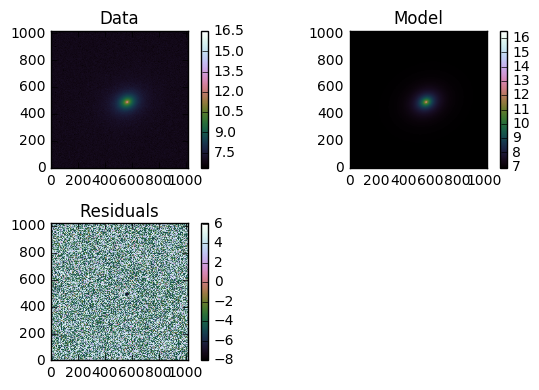

In [26]:
residuals = image - model(x0, x1).reshape(shape)

plt.subplot(2, 2, 1)
plt.imshow(np.arcsinh(image), extent=boundaries)
plt.colorbar()
plt.title('Data')

plt.subplot(2, 2, 2)
plt.imshow(np.arcsinh(model(x0, x1).reshape(shape)), extent=boundaries)
plt.colorbar()
plt.title('Model')

plt.subplot(2, 2, 3)
plt.imshow(np.arcsinh(residuals), extent=boundaries)
plt.colorbar()
plt.title('Residuals')
plt.tight_layout()

In [27]:
ui.set_stat("cash")

In [28]:
residuals.sum()/image.sum()

0.0018266653826312629

In [36]:
ui.confidence()

TypeError: catching classes that do not inherit from BaseException is not allowed

In [31]:
stats, accept, params = ui.get_draws(1, niter=100000)

Using Priors:
model_one.r0: <function flat at 0x7f2391f79d08>
model_one.xpos: <function flat at 0x7f2391f79d08>
model_one.ypos: <function flat at 0x7f2391f79d08>
model_one.ellip: <function flat at 0x7f2391f79d08>
model_one.theta: <function flat at 0x7f2391f79d08>
model_one.ampl: <function flat at 0x7f2391f79d08>
model_one.n: <function flat at 0x7f2391f79d08>
model_two.c0: <function flat at 0x7f2391f79d08>


/export/miniconda/miniconda/envs/sherpa-workshop/lib/python3.5/site-packages/sherpa/sim/mh.py:114: RuntimeWarning: covariance is not positive-semidefinite.
  nsample  = np.random.multivariate_normal(zero_vec, sigma)


In [32]:
print(source, "\n\n", model)

(src1 + src2)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   src1.r0      thawed           45            0  3.40282e+38           
   src1.xpos    thawed          560 -3.40282e+38  3.40282e+38           
   src1.ypos    thawed          485 -3.40282e+38  3.40282e+38           
   src1.ellip   thawed          0.2            0        0.999           
   src1.theta   thawed          0.4     -6.28319      6.28319    radians
   src1.ampl    thawed         3500 -3.40282e+38  3.40282e+38           
   src1.n       frozen            4          0.1           10           
   src2.c0      thawed          500 -3.40282e+38  3.40282e+38            

 (model_one + model_two)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   model_one.r0 thawed      45.7425         0.05        50000           
   model_o

In [33]:
parnames = [p.fullname for p in model.pars if not p.frozen]
mapping = [p.replace('model_one', 'src1') for p in parnames]
mapping = [p.replace('model_two', 'src2') for p in mapping]
parvals = [getattr(source_one, parname.split('.')[-1]).val
           if 'src1' in parname
           else getattr(source_two, parname.split('.')[-1]).val
           for parname in mapping]

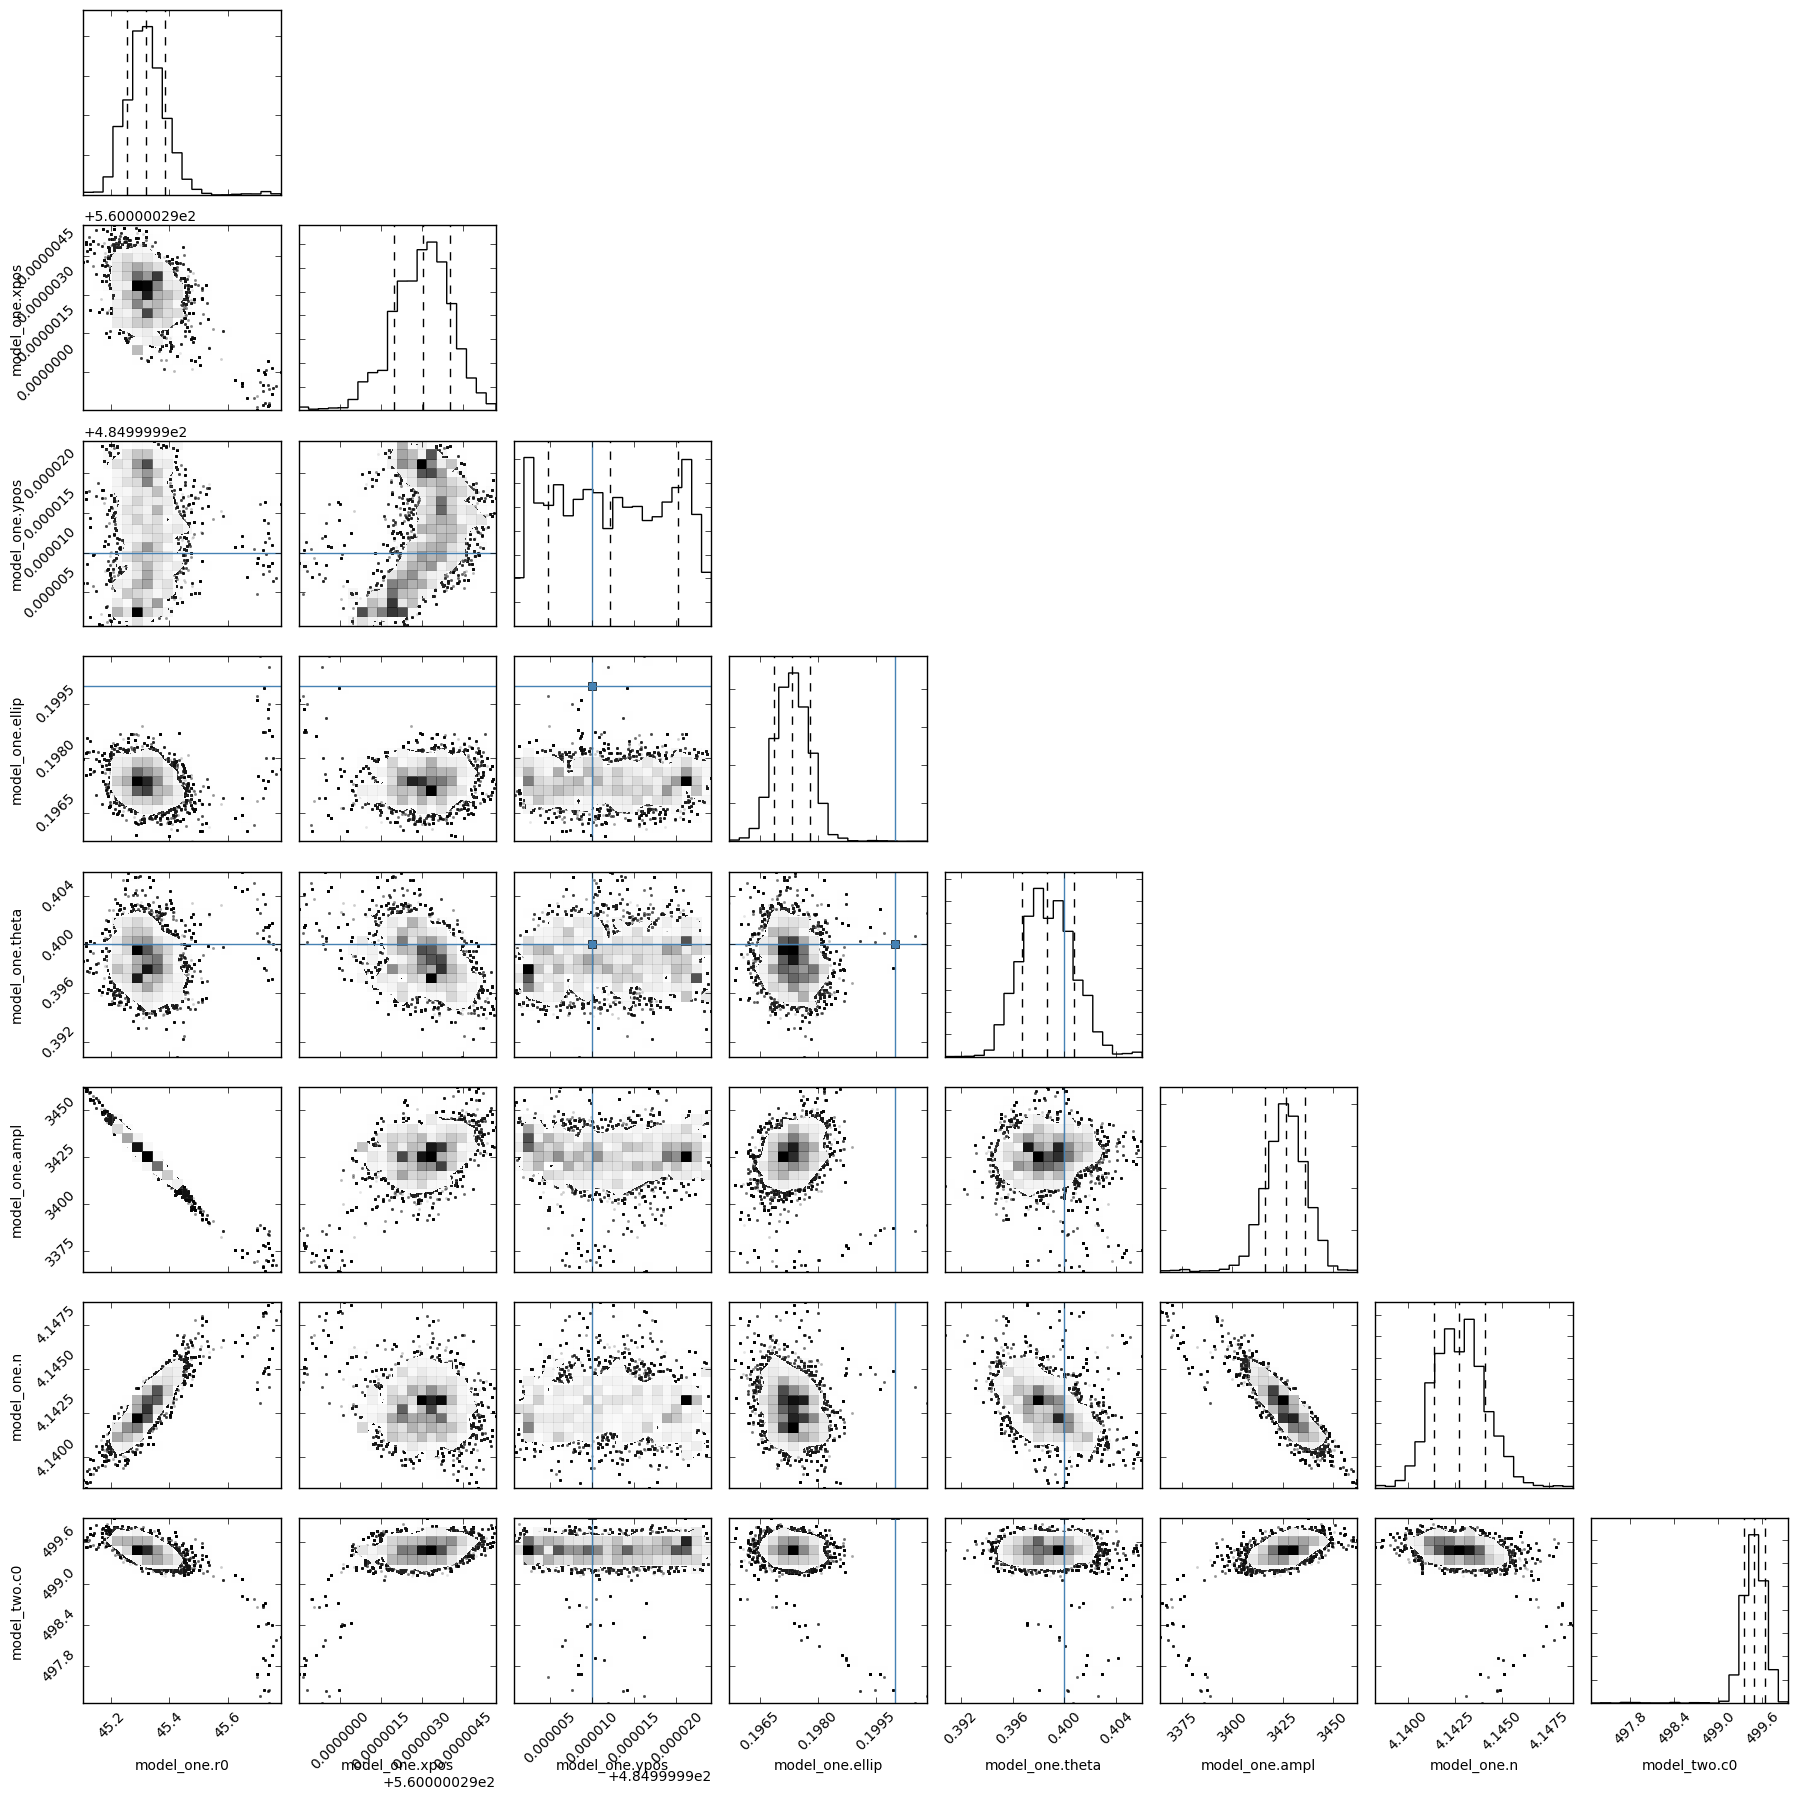

In [34]:
burnin = 0

_ = corner.corner(params[:,burnin:].T, labels=parnames, quantiles=[0.16, 0.5, 0.84], plot_contours=False, truths=parvals)
plt.tight_layout()